In [46]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

In [47]:
mnist = tf.keras.datasets.mnist


In [48]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [49]:
x_train.shape

(60000, 28, 28)

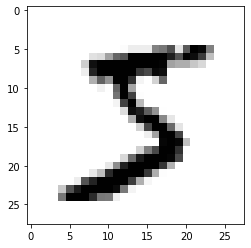

In [50]:
plt.imshow(x_train[0], cmap=plt.cm.binary)


In [51]:

#Reshaping and normalising

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)


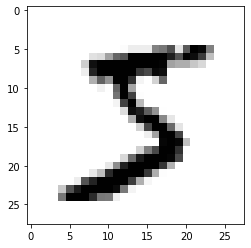

In [52]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [53]:
#Convolution
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters= 64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
#Pooling 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Second Layer
cnn.add(tf.keras.layers.Conv2D(filters= 64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Third layer
cnn.add(tf.keras.layers.Conv2D(filters= 64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Flattening
cnn.add(tf.keras.layers.Flatten())

#ANN(Fully conected layer)
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

#ANN(Fully conected layer)
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

#Output
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)               

In [54]:
cnn.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])
cnn.fit(x_train, y_train , epochs = 5, validation_split=0.3)


Epoch 1/5
1313/1313 [==============================] - 65s 49ms/step - loss: 0.2711 - accuracy: 0.9145 - val_loss: 0.1027 - val_accuracy: 0.9687
Epoch 2/5
1313/1313 [==============================] - 65s 50ms/step - loss: 0.0863 - accuracy: 0.9741 - val_loss: 0.0795 - val_accuracy: 0.9761
Epoch 3/5
1313/1313 [==============================] - 67s 51ms/step - loss: 0.0627 - accuracy: 0.9812 - val_loss: 0.0714 - val_accuracy: 0.9798
Epoch 4/5
1313/1313 [==============================] - 66s 50ms/step - loss: 0.0509 - accuracy: 0.9846 - val_loss: 0.0590 - val_accuracy: 0.9827
Epoch 5/5
1313/1313 [==============================] - 66s 51ms/step - loss: 0.0413 - accuracy: 0.9869 - val_loss: 0.0549 - val_accuracy: 0.9831


In [55]:
y_pred = cnn.predict(x_test)


In [56]:
print(np.argmax(y_pred[0]))

7


In [57]:
y_pred.shape

(10000, 10)

In [59]:
y_final = np.zeros(10000)
for i in range(0,10000):
    y_final[i] = np.argmax(y_pred[i])

In [65]:
y_final

array([7, 2, 1, ..., 4, 5, 6])

In [66]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_final)
print(cm)
accuracy_score(y_test, y_final)

[[ 969    2    1    1    3    0    2    1    1    0]
 [   0 1134    0    0    0    0    0    1    0    0]
 [   3    3 1004    4    2    0    0   13    3    0]
 [   0    1    1 1000    0    5    0    1    2    0]
 [   1    0    1    0  977    0    1    0    0    2]
 [   2    0    0    3    0  872    3    1    3    8]
 [   3    5    1    0    1    2  943    0    3    0]
 [   0    5   10    0    1    1    0 1009    1    1]
 [   0    2    2    1    0    0    0    0  968    1]
 [   6    0    0    0    7    0    1    4    5  986]]


0.9862